<a href="https://colab.research.google.com/github/Martin-Tello/CNN/blob/main/ORESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-resnet

  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=22a0c4c62f0fd3218482388f94010746295c08109fdf3489ef6faedc0b409c70
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet


In [1]:
!pip install tensorflow==2.1


     |████████████████████████████████| 421.8 MB 20 kB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 448 kB 51.5 MB/s 
     |████████████████████████████████| 3.8 MB 39.1 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=085a7f100ba0252dada4c91e4b9c78166d239874f59d1005c88fd525158319f7
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [2]:
!pip install keras==2.3.1


     |████████████████████████████████| 377 kB 9.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [3]:
import tensorflow
print(tensorflow.__version__)

2.1.0


In [4]:
pip install --upgrade keras_applications

In [5]:
!pip install Keras-Preprocessing

In [6]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 6.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [7]:
  !pip install keras_vggface

In [8]:
pip install --upgrade keras_applications

In [5]:
pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9 MB 9.0 MB/s 
     |████████████████████████████████| 15.7 MB 54.7 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.14.1 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incomp

In [9]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
width_shape = 128
height_shape = 128
num_classes = 11
epochs = 50
batch_size = 256

In [14]:
train_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/TRAIN'  
validation_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/VALIDATION_CONMASCARILLA'

In [15]:
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

Found 10936 images belonging to 11 classes.
Found 5500 images belonging to 11 classes.


In [16]:
nb_train_samples = 10936
nb_validation_samples = 5500

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50

image_input = Input(shape=(width_shape, height_shape, 3))

m_Resnet50 = ResNet50(input_tensor=image_input, include_top=False,weights='imagenet')

m_Resnet50.summary()

last_layer = m_Resnet50.layers[-1].output

x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-6]:
    layer.trainable = False

    
custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

94773248/94765736 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
__________________________

In [18]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 42 steps, validate for 21 steps
Epoch 1/50
42/42 [==============================] - 5025s 120s/step - loss: 3.8820 - accuracy: 0.1017 - val_loss: 3.7873 - val_accuracy: 0.1168
Epoch 2/50
42/42 [==============================] - 191s 5s/step - loss: 3.1434 - accuracy: 0.1531 - val_loss: 3.1197 - val_accuracy: 0.1512
Epoch 3/50
42/42 [==============================] - 189s 5s/step - loss: 2.6722 - accuracy: 0.2121 - val_loss: 2.6473 - val_accuracy: 0.1953
Epoch 4/50
42/42 [==============================] - 188s 4s/step - loss: 2.3285 - accuracy: 0.2713 - val_loss: 2.3526 - val_accuracy: 0.2388
Epoch 5/50
42/42 [==============================] - 189s 5s/step - loss: 2.0573 - accuracy: 0.3301 - val_loss: 2.1199 - val_accuracy: 0.2881
Epoch 6/50
42/42 [==============================] - 188s 4s/step - loss: 1.8306 - accuracy: 0.3967 - val_loss: 1.9130 - val_

In [19]:
custom_model.save("model_RESNET50.h5")

In [20]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

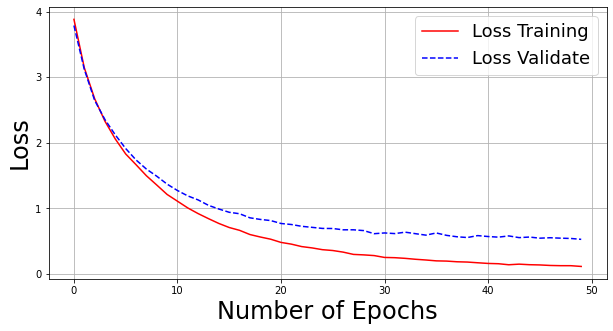

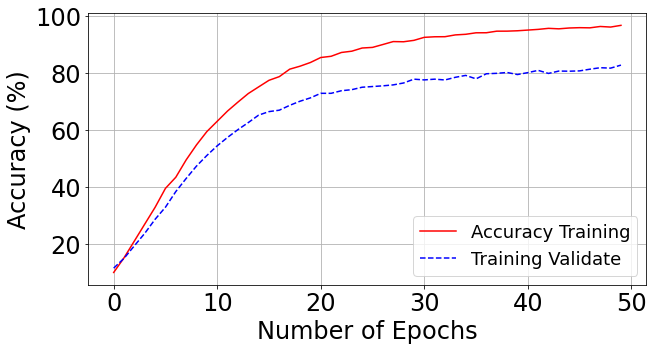

In [21]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

Sujeto 3


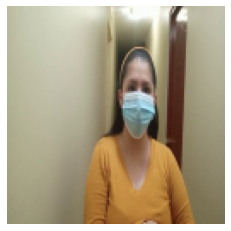

In [25]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model

names = ['Sujeto 1','Sujeto 2','Sujeto 3','Sujeto 4','Sujeto 5','Sujeto 6','Sujeto 7','Sujeto 8','Sujeto 9',
        'Sujeto 10','Sujeto 11']
         #'AFRICAN FIREFINCH','ALBATROSS','ALEXANDRINE PARAKEET','AMERICAN AVOCET','AMERICAN BITTERN',
         #'AMERICAN COOT','AMERICAN GOLDFINCH','AMERICAN KESTREL','AMERICAN PIPIT','AMERICAN REDSTART']

modelt = load_model("/content/model_RESNET50.h5")
#modelt = custom_model

imaget_path = "/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/TEST_CONMASCARILLA/TEST_BRENDA/frame268.jpg"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 1100 images belonging to 11 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
              precision    recall  f1-score   support

           0     0.9901    1.0000    0.9950       100
           1     0.5823    0.4600    0.5140       100
           2     0.6345    0.9200    0.7510       100
           3     0.7692    1.0000    0.8696       100
           4     0.3745    1.0000    0.5450       100
           5     0.6098    1.0000    0.7576       100
           6     1.0000    0.4500    0.6207       100
           7     1.0000    0.0200    0.0392       100
           8     1.0000    0.2500    0.4000       100
           9     1.0000    1.0000    1.0000       100
          10     1.0000    0.4200    0.5915       100

    accuracy                         0.6836      1100
   macro avg     0.8146    0.6836    0.6440      1100
weighted avg     0.8146    0.6836    0.6440      1100



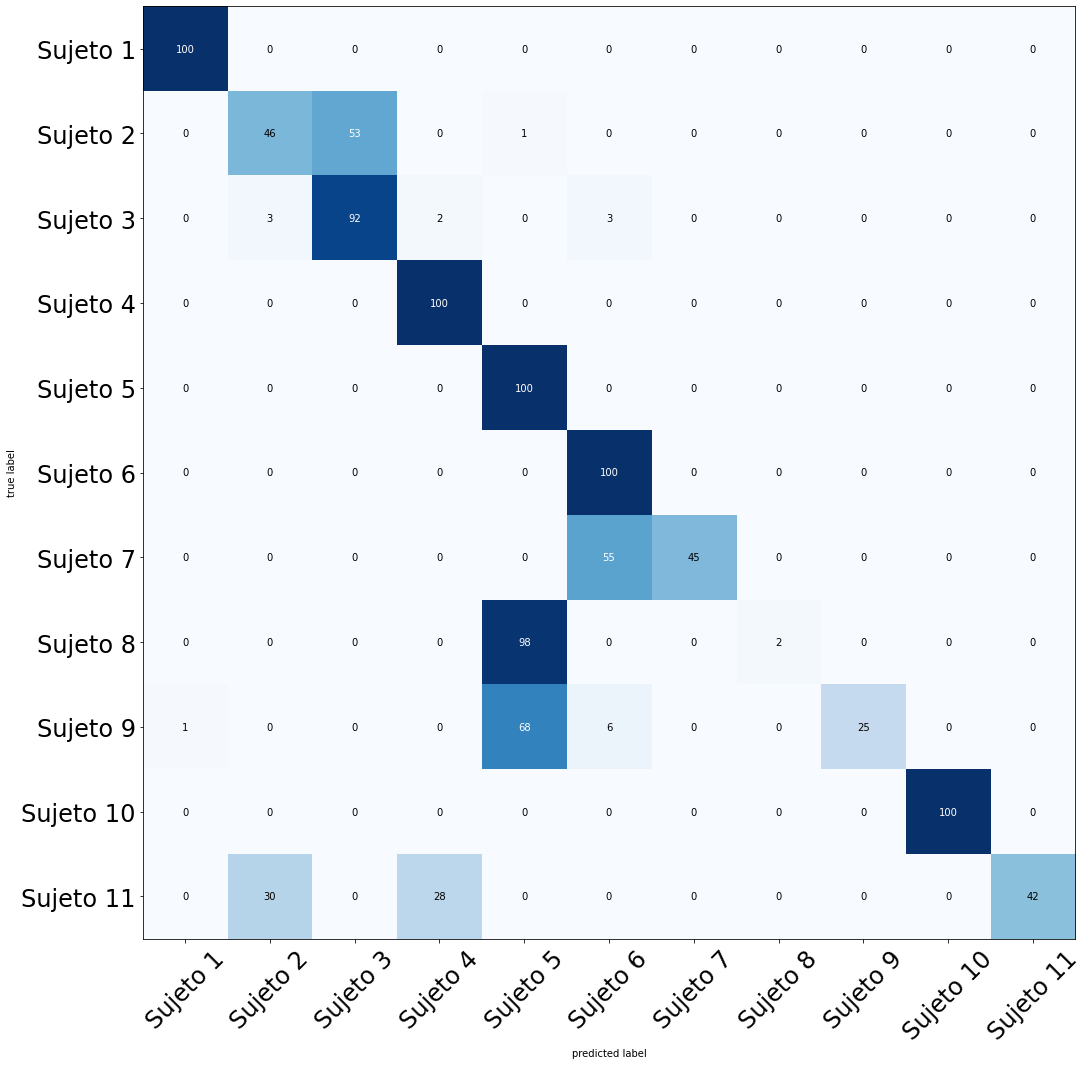

In [27]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['Sujeto 1','Sujeto 2','Sujeto 3','Sujeto 4','Sujeto 5','Sujeto 6','Sujeto 7','Sujeto 8','Sujeto 9',
        'Sujeto 10','Sujeto 11']


test_data_dir = '/content/drive/MyDrive/Hardcode/ENTRENAMIENTO_VGG/TEST_CONMASCARILLA'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("/content/model_RESNET50.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(15,15), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))